# Movie Recommendation System - Hulu
![3bc2f36497f3f66074ba25515128e0d8](https://github.com/user-attachments/assets/a07857a2-3bff-4ace-b509-b20254ed3717)

## Introduction
In today’s highly competitive streaming landscape, personalized movie recommendations play a crucial role in user engagement and retention. Hulu, which holds 11% of the market share in the streaming industry, is looking to upgrade its current movie recommendation algorithm. The aim of this project is to develop a machine learning model that provides users with the top 5 movie recommendations based on their previous ratings of other movies.

Our audience for this project is the Hulu Technology Team, headed by the CTO of Hulu.This project will explore an enhanced algorithm to improve the quality of recommendations for Hulu subscribers.
## Main Objective:

- To build a movie recommendation model that can provide the top 5 movie recommendations to a user based on their previous ratings. The model is aimed at enhancing Hulu's current recommendation system.
  
## Data Understanding
The dataset used in this project was sourced from [Grouplens](https://grouplens.org/datasets/movielens/100k/), utilizing information from IMDb and TMDb. The data contains over 100,000 movie ratings provided by 610 different users for about 9,700 movies, collected over a time span from 1996 to 2018. Each user has reviewed at least 20 different movies.

While the full dataset consists of approximately 1.9 million ratings, this project focuses on a subset of 100,000 ratings due to time constraints.

### Key Features of the Dataset:
- User ID: A unique identifier for each user.
- Movie ID: A unique identifier for each movie.
- Ratings: A score from 0.5 to 5.0 given by a user for a movie.
- Timestamp: The time when the rating was provided.
- Movie Metadata: Information about the movies, such as title and genres.
This data is crucial for building a collaborative filtering model that can predict which movies a user is likely to rate highly based on the behavior of similar users.


## Target accuracy threshold **(90/%)**

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 1.Data Exploration and  Cleaning

In [2]:
ratings_path = 'ratings.csv'
movies_path = 'movies.csv'
rt_df = pd.read_csv(ratings_path)
mv_df = pd.read_csv(movies_path)

### a. Movie Dataset

In [3]:
mv_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
mv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


The movies data set has **9742 rows** and **3 columns**, where each row represents one movie. 
 - **The first column** : movieId corresponds to a unique id that defines each movie in this dataset.
 - **The second column** : title contains the movie title which, in this case, is a combination of both the title of the movie and the year it was released.
 - **The final column** is genres and it contains the genres of the movie, some movies are tied to multiple genres. 

In [5]:
mv_df.title.duplicated().sum()

5

In [6]:
# Dropping the 5 duplicates
mv_df.drop_duplicates(subset='title', inplace=True)

In [7]:
len(mv_df)

9737

In [8]:
# Split title column into two new columns: Title and year 

mv_df['Title'] = mv_df['title'].str.split('(', n=1, expand=True)[0]

mv_df['year_released'] = mv_df['title'].str.split('(', n=1, expand=True)[1]

In [9]:
# Drop original column title

mv_df.drop(columns='title', inplace=True)


In [10]:
mv_df

,movieId,genres,Title,year_released
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995)
1,2,Adventure|Children|Fantasy,Jumanji,1995)
2,3,Comedy|Romance,Grumpier Old Men,1995)
3,4,Comedy|Drama|Romance,Waiting to Exhale,1995)
4,5,Comedy,Father of the Bride Part II,1995)
...,...,...,...,...
9737,193581,Action|Animation|Comedy|Fantasy,Black Butler: Book of the Atlantic,2017)
9738,193583,Animation|Comedy|Fantasy,No Game No Life: Zero,2017)
9739,193585,Drama,Flint,2017)
9740,193587,Action|Animation,Bungo Stray Dogs: Dead Apple,2018)


In [11]:
# Format year_released column

mv_df['year_released'] = mv_df.year_released.str.replace(')', '')

In [12]:
mv_df

,movieId,genres,Title,year_released
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Adventure|Children|Fantasy,Jumanji,1995
2,3,Comedy|Romance,Grumpier Old Men,1995
3,4,Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Comedy,Father of the Bride Part II,1995
...,...,...,...,...
9737,193581,Action|Animation|Comedy|Fantasy,Black Butler: Book of the Atlantic,2017
9738,193583,Animation|Comedy|Fantasy,No Game No Life: Zero,2017
9739,193585,Drama,Flint,2017
9740,193587,Action|Animation,Bungo Stray Dogs: Dead Apple,2018


In [13]:
# Changing the current format of genres to a list
mv_df['genres']=[row.strip().lower().replace('|',', ') for row in mv_df['genres']]

In [14]:
mv_df

,movieId,genres,Title,year_released
0,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995
1,2,"adventure, children, fantasy",Jumanji,1995
2,3,"comedy, romance",Grumpier Old Men,1995
3,4,"comedy, drama, romance",Waiting to Exhale,1995
4,5,comedy,Father of the Bride Part II,1995
...,...,...,...,...
9737,193581,"action, animation, comedy, fantasy",Black Butler: Book of the Atlantic,2017
9738,193583,"animation, comedy, fantasy",No Game No Life: Zero,2017
9739,193585,drama,Flint,2017
9740,193587,"action, animation",Bungo Stray Dogs: Dead Apple,2018


### b. Ratings Dataset

In [15]:
rt_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


The ratings data frame has **100,836 rows** and **4 columns**, where each row is one rating given by a specific user to a specific movie. 
- **The first column** : (userId) corresponds to a unique id that identifies the specific user that rated the specific movie.
- **Second column**: (movieId). This movieId is the same identifying key that is present in the movies data frame.
- **The third column** represents the rating that a user gave the movie, on a 1-5 rating scale.
- **Lastly**, the final column corresponds to the date and time the rating was made, in the format of a UNIX timestamp.

In [16]:
# converted timestamp to datetime
rt_df['timestamp'] = pd.to_datetime(rt_df['timestamp'], unit='s')

In [17]:
# Checking for duplicates
rt_df.duplicated().sum()

0

In [18]:
# Checking for missing values
rt_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

## Merging the Datasets (movies&ratings)

In [19]:
# merging rating and movies
movie_rating = mv_df.merge(rt_df, on='movieId', how='outer')

In [20]:
movie_rating

,movieId,genres,Title,year_released,userId,rating,timestamp
0,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,1.0,4.0,2000-07-30 18:45:03
1,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,5.0,4.0,1996-11-08 06:36:02
2,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,7.0,4.5,2005-01-25 06:52:26
3,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,15.0,2.5,2017-11-13 12:59:30
4,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,17.0,4.5,2011-05-18 05:28:03
...,...,...,...,...,...,...,...
100849,193581,"action, animation, comedy, fantasy",Black Butler: Book of the Atlantic,2017,184.0,4.0,2018-09-16 14:44:42
100850,193583,"animation, comedy, fantasy",No Game No Life: Zero,2017,184.0,3.5,2018-09-16 14:52:25
100851,193585,drama,Flint,2017,184.0,3.5,2018-09-16 14:56:45
100852,193587,"action, animation",Bungo Stray Dogs: Dead Apple,2018,184.0,3.5,2018-09-16 15:00:21


In [21]:
movie_rating.dropna(inplace=True)

In [22]:
movie_rating

,movieId,genres,Title,year_released,userId,rating,timestamp
0,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,1.0,4.0,2000-07-30 18:45:03
1,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,5.0,4.0,1996-11-08 06:36:02
2,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,7.0,4.5,2005-01-25 06:52:26
3,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,15.0,2.5,2017-11-13 12:59:30
4,1,"adventure, animation, children, comedy, fantasy",Toy Story,1995,17.0,4.5,2011-05-18 05:28:03
...,...,...,...,...,...,...,...
100849,193581,"action, animation, comedy, fantasy",Black Butler: Book of the Atlantic,2017,184.0,4.0,2018-09-16 14:44:42
100850,193583,"animation, comedy, fantasy",No Game No Life: Zero,2017,184.0,3.5,2018-09-16 14:52:25
100851,193585,drama,Flint,2017,184.0,3.5,2018-09-16 14:56:45
100852,193587,"action, animation",Bungo Stray Dogs: Dead Apple,2018,184.0,3.5,2018-09-16 15:00:21


In [23]:
# Determine number of unique users
movie_rating['userId'].nunique()

610

- In this case, 610 unique users made 100813 ratings of 9737 movies.

# 2. Exploratory Data Analysis (EDA)

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


## Univariate Analysis

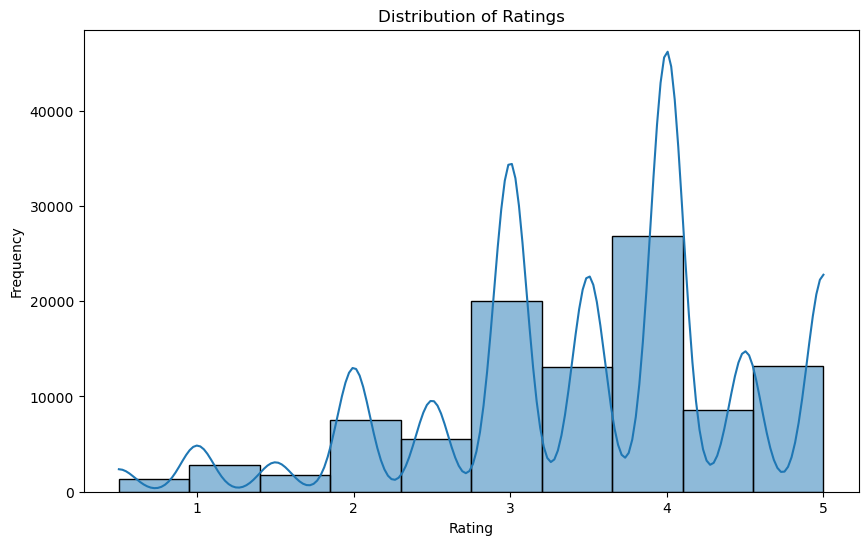

In [25]:
# Distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(movie_rating['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Distribution of Genres')

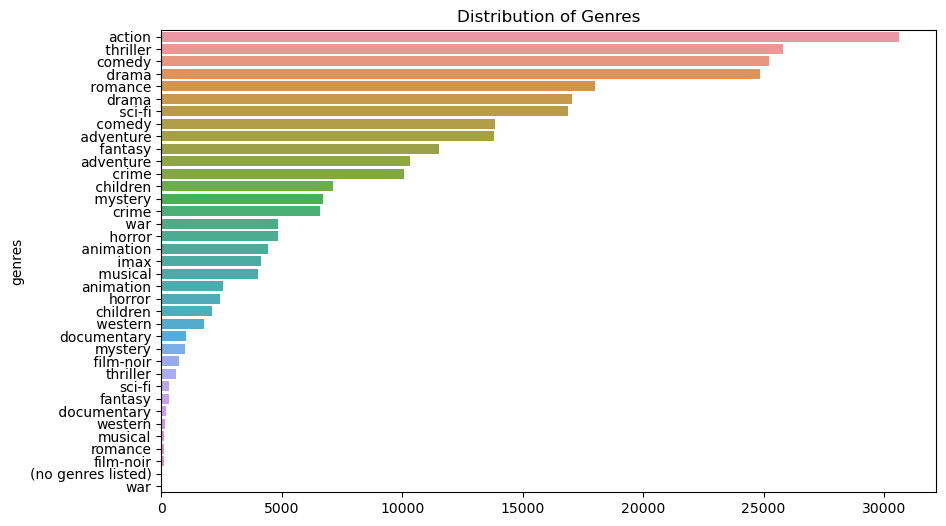

In [26]:
# Count of different genres
plt.figure(figsize=(10,6))
genres_count = movie_rating['genres'].apply(lambda x: x.split(',')).explode().value_counts()
sns.barplot(y=genres_count.index, x=genres_count.values)
plt.title('Distribution of Genres')

## Bivariate Analysis

# Modelling

## Encoding Genres

In [27]:
# One-hot encoding of genres
from sklearn.preprocessing import MultiLabelBinarizer

# Assuming the genres column has already been split
genres = movie_rating['genres'].str.split(',', expand=False)
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(genres)
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# Merging the one-hot encoded genres back to the original dataframe
movie_ratings = pd.concat([movie_rating, genres_df], axis=1)


**Surprise** is the main library we used to produce our **collaborative filtering model**.This library has endogenous methods of splitting our data set, cross validating, performing grid searches as well various different algorithms that can be used to build recommendation systems.

In [28]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import cross_validate,GridSearchCV
from surprise.prediction_algorithms import SVD, SVDpp, NMF, BaselineOnly,\
                                            NormalPredictor, KNNBasic
from sklearn.model_selection import train_test_split

### Loading the data in surprise format

In [29]:
# Define the format of the data
reader = Reader(rating_scale=(0.5, 5))

# Load data into Surprise's dataset structure
data = Dataset.load_from_df(movie_rating[['userId', 'movieId', 'rating']], reader)

from surprise.model_selection import train_test_split

# Split into training and test sets using Surprise's train_test_split
trainset, testset = train_test_split(data, test_size=0.2)


## 1. KNN MODEL

The k-nearest neighbors (KNN) algorithm is a straightforward supervised machine learning method applicable to both classification and regression tasks. Here, we are utilized it to power our recommendation system. The core idea is to predict ratings for movies that the user hasn't seen, based on the ratings provided by similar users, referred to as the nearest "neighbors."

In [30]:
from surprise import KNNBasic

# KNN Model
knn_model = KNNBasic()

# Cross-validate and evaluate KNN model
knn_results = cross_validate(knn_model, data, measures=['RMSE'], cv=5, verbose=True)

# Fit the model on the trainset
knn_model.fit(trainset)

# Make predictions on the testset
predictions_knn = knn_model.test(testset)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9526  0.9433  0.9519  0.9475  0.9409  0.9473  0.0046  
Fit time          1.02    0.83    1.23    0.73    0.69    0.90    0.20    
Test time         7.70    6.59    7.76    4.44    3.98    6.10    1.60    
Computing the msd similarity matrix...
Done computing similarity matrix.


## 2. SVD Model

After defining our baseline model and exploring the KNN algorithm, we decided to try using Singular Value Decomposition (SVD) algorithm, in the hopes that it would improve the accuracy of our model and lower the RSME. The surprise library uses a form of SVD called Funk's SVD, the premise behind it is a matrix factorization-based model. This means it transforms a user-item matrix (in our case, a user-movie ratings matrix)into latent factor matrices. It is also important to note that errors are minimized using stochastic gradient descent. This means that both regularization and learning rate are hyper-parameters that we can tune. Number of factors and number of epochs are also hyper-parameters we tuned.

In [31]:
from surprise import SVD
from surprise.model_selection import cross_validate

# Build SVD model
svd_model = SVD()

# Cross-validate and evaluate SVD model
svd_results = cross_validate(svd_model, data, measures=['RMSE'], cv=5, verbose=True)

# Fit the model on the trainset
svd_model.fit(trainset)

# Make predictions on the testset
predictions = svd_model.test(testset)


Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8719  0.8749  0.8745  0.8683  0.8744  0.8728  0.0025  
Fit time          4.50    4.82    4.94    5.17    4.99    4.88    0.22    
Test time         0.56    0.75    1.79    1.41    0.89    1.08    0.45    


In [32]:
# Evaluation of the models
# Extract RMSE results
svd_rmse = svd_results['test_rmse'].mean()
knn_rmse = knn_results['test_rmse'].mean()

print(f"SVD RMSE: {svd_rmse}")
print(f"KNN RMSE: {knn_rmse}")

# Set a target RMSE threshold
target_rmse = 0.9

# Determine if any model meets the target RMSE
if svd_rmse > target_rmse:
    print("SVD model meets the target accuracy")
else:
    print("SVD model does not meet the target accuracy")

if knn_rmse > target_rmse:
    print("KNN model meets the target accuracy")
else:
    print("KNN model does not meet the target accuracy")


SVD RMSE: 0.8728081357142321
KNN RMSE: 0.9472552016216366
SVD model does not meet the target accuracy
KNN model meets the target accuracy


- Knn model seems to perform better than our SVD model

### Hyperparameter Tuning of our model

In [33]:
from surprise.model_selection import GridSearchCV

# SVD hyperparameter tuning
param_grid = {'n_factors': [50, 100, 200], 'lr_all': [0.002, 0.005, 0.01], 'reg_all': [0.02, 0.1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

# Get the best parameters and RMSE score
best_params_svd = gs.best_params['rmse']
best_rmse_svd = gs.best_score['rmse']

print(f"Best SVD Params: {best_params_svd}")
print(f"Best SVD RMSE: {best_rmse_svd}")


Best SVD Params: {'n_factors': 200, 'lr_all': 0.01, 'reg_all': 0.1}
Best SVD RMSE: 0.8666046867962965


## 3. NMF

The last algorithm we examined in the Surprise library was Non-negative Matrix Factorization (NMF). The main distinction between this algorithm and the previously discussed SVD is that NMF uses a specific step size for the stochastic gradient descent during regularization, ensuring that all user and item factors remain positive. Although this model can be susceptible to overfitting, we can take measures to mitigate this by reducing the dimensionality of our data and factors.

In [34]:
model3 = NMF()

In [36]:
cross_validate(model3, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9188  0.9261  0.9222  0.9204  0.9274  0.9230  0.0033  
Fit time          7.64    9.05    6.85    8.41    9.48    8.29    0.95    
Test time         0.40    0.78    0.40    0.45    0.59    0.53    0.15    


{'test_rmse': array([0.91877991, 0.9261499 , 0.92220724, 0.92042922, 0.9274219 ]),
 'fit_time': (7.64341402053833,
  9.04745101928711,
  6.8515400886535645,
  8.408618927001953,
  9.481704711914062),
 'test_time': (0.4015493392944336,
  0.7833285331726074,
  0.3998415470123291,
  0.4531521797180176,
  0.5878782272338867)}

In [39]:
cross_validate(NMF(n_factors=10,n_epochs=25), data, measures=['RMSE'], 
               cv=5, verbose=True)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9532  0.9567  0.9595  0.9590  0.9627  0.9582  0.0032  
Fit time          4.09    5.20    2.92    4.63    4.40    4.25    0.76    
Test time         0.92    0.52    0.52    0.92    0.59    0.69    0.19    


{'test_rmse': array([0.9532165 , 0.95668505, 0.95949848, 0.95904345, 0.96268651]),
 'fit_time': (4.090775966644287,
  5.204988241195679,
  2.921797037124634,
  4.629682302474976,
  4.402790069580078),
 'test_time': (0.9244668483734131,
  0.516228199005127,
  0.5173370838165283,
  0.9169213771820068,
  0.5928056240081787)}

In [41]:
nmf_cv_results = cross_validate(NMF(n_factors=20,n_epochs=50), data, measures=['RMSE'], 
               cv=5, verbose=True)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9210  0.9168  0.9126  0.9262  0.9306  0.9215  0.0064  
Fit time          9.35    8.51    9.12    10.48   9.72    9.43    0.65    
Test time         0.41    0.58    0.40    0.49    1.08    0.59    0.25    


In [42]:
nmf_rsme = nmf_cv_results['test_rmse'].mean()
nmf_rsme

0.921450872764973

# MODEL PERFORMANCE